###### Tomé SADONES & Florent TACHENNE
# TP 3 : Steganography and Image indexing
---
## Part 2 : Image indexing
Cette partie du TP a pour but de réaliser des algorithmes permettant de sélectionner des images qui ressemblent à une image donnée parmis une base de données de plus de 2000 images. Cela s'inspire de ce que *Google* propose avec son outil permettant de retrouver les images s'apparentant à une image que l'on dépose dans la barre de recherche de *Google Images*. Ici, nous utilisons la librairie *pandas* qui permet de manipuler aisément les big datas. 

### Chargement de la database

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as skio
import time as time
import skimage.exposure as skie
from pandas import DataFrame, read_csv

Toutes les images sont indexées avec sur la 1ère colonne le **numéro** de l'image puis sa **classe** (1 ie artificiel ou 2 ie naturel) et enfin sa **sous-classe** (1 à 8). Ensuite parmis les données, on retrouve **24 composantes issues du filtrage de Gabor** des images avec trois fréquences de coupure différentes. Enfin, on a aussi accès aux valeurs de **luminance** (Y) et de **chrominances** (Cb et Cr). 

In [2]:
database_names = "GaborFeature0	GaborFeature1	GaborFeature2	GaborFeature3	GaborFeature4	GaborFeature5	GaborFeature6	GaborFeature7	GaborFeature8	GaborFeature9	GaborFeature10	GaborFeature11	GaborFeature12	GaborFeature13	GaborFeature14	GaborFeature15	GaborFeature16	GaborFeature17	GaborFeature18	GaborFeature19	GaborFeature20	GaborFeature21	GaborFeature22	GaborFeature23	Y_Feature\tCr_Feature	Cb_Feature".split(
    "\t")

df = read_csv("./dataset.csv",
              sep=';',
              names=database_names)
df.head(10)

,,,GaborFeature0,GaborFeature1,GaborFeature2,GaborFeature3,GaborFeature4,GaborFeature5,GaborFeature6,GaborFeature7,GaborFeature8,GaborFeature9,...,GaborFeature17,GaborFeature18,GaborFeature19,GaborFeature20,GaborFeature21,GaborFeature22,GaborFeature23,Y_Feature,Cr_Feature,Cb_Feature
0,2,1,-0.478157,-0.491989,-0.559984,-0.603699,-0.630668,-0.531222,-0.471025,-0.387644,1.115011,1.034301,...,0.714997,0.137563,0.082468,-0.452533,-0.417575,-0.436358,-0.217539,1.660195,0.563975,-1.072575
1,2,1,-0.544804,-0.548131,-0.663868,-0.730327,-0.872497,-0.957319,-0.941976,-0.856133,-0.788548,-0.848933,...,-0.865992,-0.865292,-0.860591,-0.829381,-0.818561,-0.893972,-0.862100,-0.069447,0.594306,-0.871950
2,2,1,-0.482588,-0.403443,-0.545915,-0.609694,-0.807157,-0.761008,-0.740401,-0.674249,-0.455677,-0.406537,...,-0.186821,-0.503433,-0.567973,-0.318818,-0.384781,-0.527436,-0.597184,-0.380007,0.483270,-0.383638
3,2,1,-0.525944,-0.521359,-0.630261,-0.716397,-0.824957,-0.926018,-0.924331,-0.831581,-0.791740,-0.844335,...,-0.879608,-0.857748,-0.851125,-0.787248,-0.797050,-0.878739,-0.839289,-0.535078,1.389306,-1.291352
4,2,1,-0.524393,-0.531614,-0.640133,-0.689023,-0.765204,-0.875224,-0.848892,-0.714081,-0.574304,-0.658229,...,0.942216,0.061634,-0.162007,-0.561368,-0.716775,-0.748193,-0.701461,-1.349330,0.398904,-0.603697
5,2,1,-0.497622,-0.513584,-0.642102,-0.706889,-0.533992,-0.465816,-0.667669,-0.604005,0.028604,-0.293746,...,-0.546143,-0.712911,-0.745702,-0.684918,-0.664184,-0.796740,-0.788765,0.539167,0.722430,-0.697102
6,2,1,-0.502159,-0.520678,-0.641243,-0.713380,-0.626758,-0.839159,-0.853301,-0.762340,-0.412681,-0.540782,...,-0.786388,-0.767123,-0.775309,-0.731900,-0.725244,-0.810668,-0.793335,-0.796251,0.767842,-0.344448
7,2,1,-0.545774,-0.544335,-0.659968,-0.721961,-0.870995,-0.945575,-0.922104,-0.804230,-0.662575,-0.772990,...,-0.490086,-0.711044,-0.737001,-0.819487,-0.790002,-0.869277,-0.811472,-0.805208,0.360413,-0.065356
8,2,1,-0.519009,-0.518533,-0.628579,-0.673799,-0.459425,-0.592643,-0.678306,-0.604091,-0.389950,-0.522068,...,-0.505114,-0.382860,-0.468310,-0.580736,-0.655095,-0.713684,-0.639921,-0.975169,-2.499603,1.927642
9,2,1,-0.459904,-0.377574,-0.515724,-0.633284,-0.412835,-0.135720,0.033770,-0.125744,0.043227,0.940652,...,-0.021492,-0.064532,-0.248426,-0.436336,0.034308,-0.230809,-0.435696,-0.765128,-0.321717,0.543124


### Choix et affichage de l'image requête

([], [])

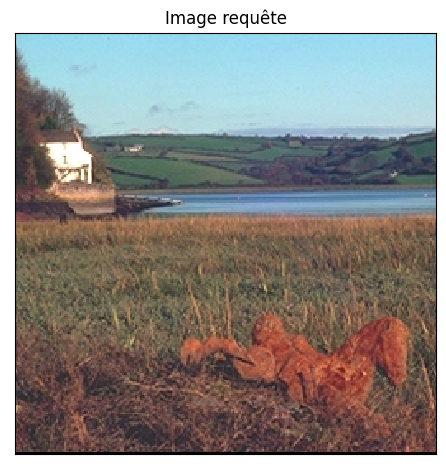

In [19]:
img_nbr = 1662
img = skio.imread("./input/" + str(img_nbr) + ".jpg")
img_requete = img
skio.imshow(img)
plt.title("Image requête")
plt.xticks([])
plt.yticks([])

### Calcul de la distance euclidienne pour toutes les composantes du tableau
On crée une copie de notre tableau puis on remplace ses valeurs par la distance euclidienne entre la valeur de l'image choisie et la valeur du tableau. 

In [12]:
df_distance = df.copy()
Y_img = df.Y_Feature[img_nbr]
Cb_img = df.Cb_Feature[img_nbr]
Cr_img = df.Cr_Feature[img_nbr]
for i in range(24):
    df_distance['GaborFeature'+str(i)] = df_distance['GaborFeature'+str(i)].apply(
        lambda x: np.sqrt((x-df_distance['GaborFeature'+str(i)][img_nbr])**2))
df_distance.Y_Feature = df_distance.Y_Feature.apply(
    lambda x: np.sqrt((x-Y_img)**2))
df_distance.Cb_Feature = df_distance.Cb_Feature.apply(
    lambda x: np.sqrt((x-Cb_img)**2))
df_distance.Cr_Feature = df_distance.Cr_Feature.apply(
    lambda x: np.sqrt((x-Cr_img)**2))

### Example de tri 
On utilise pour cela la méthode *sort_values* en lui indiquant les colonnes qui servent de critère de tri. Cette méthode réalise un tri qui dépend de l'ordre de la liste donnée en paramètre. Regardons l'example ci-dessous. Le tableau est d'abord classé par 'Sales', premier critère donné à la fonction *sort_values*. Ensuite, il est trié par 'Price'. Cela signifie que la fonction *sort_values* ne donne pas la même importance à tous les critères de tri donnés en paramètre. 

In [ ]:
sales = [200, 300, 400, 200, 300, 300]
prices = [3, 1, 2, 4, 3, 2]

#example = DataFrame({'Sales': sales, 'Price': prices})
example = DataFrame({'Sales', 'Price'})
print("Before Sorting:")
print(example)
#sorted_example = example.sort_values(by=['Sales', 'Price'])
#print("After Sorting:")
#print(sorted_example)

### Tri avec Y, Cb, Cr comme critère
Regardons désormais ce que cela donne sur notre problème. On réalise le tri par ordre croissant des distances pour les critères Y, Cb et Cr. On remarque que l'image 2296 est classée devant l'image 2288 alors que si l'on fait la somme de toutes les distances, celle ci serait supérieure à celle de l'image 2288. 

In [14]:
ycbcr_col = ['Y_Feature', 'Cb_Feature', 'Cr_Feature']
YCbCr_sorted = df_distance[ycbcr_col]
YCbCr_sorted = YCbCr_sorted.sort_values(
    by=['Y_Feature', 'Cb_Feature', 'Cr_Feature']).head()
print(YCbCr_sorted)
YCbCr_sorted = YCbCr_sorted.index

          Y_Feature  Cb_Feature  Cr_Feature
1662 2 6   0.000000    0.000000    0.000000
1943 2 6   0.001433    4.892238    4.983111
2296 1 7   0.001985    1.512562    1.087927
2288 1 7   0.002064    1.118287    0.853594
2323 1 7   0.002485    2.166693    0.770696


On affiche les **cinq premières images** du haut de notre dataframe trié, avec en titre leur **classe** et leur **sous-classe**. La première est évidemment notre image requête puisqu'elle est la plus proche d'elle même. On remarque bien les couleurs ocre et bleu ciel présentent sur toutes les images et qui influent la valeur de la luminance Y, premier critère dans notre liste de tri.

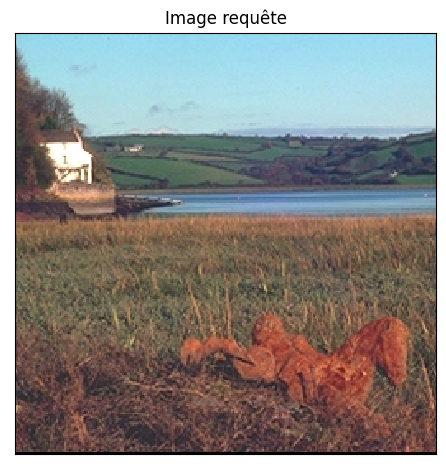

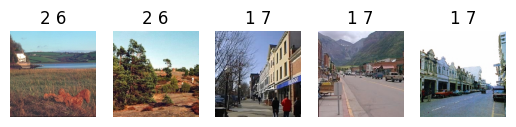

In [15]:
fig1 = plt.figure(1)

skio.imshow(img_requete)
plt.title("Image requête")
plt.xticks([])
plt.yticks([])

plt.figure(2)

for i in range(5):
    img = skio.imread("./input/" + str(YCbCr_sorted[i][0]) + ".jpg")
    plt.subplot(
        1, 5, i+1), plt.title(str(YCbCr_sorted[i][1])+' '+str(YCbCr_sorted[i][2])), plt.axis('off')
    plt.imshow(img)
plt.show()

Comme le résultat n'est pas satisfaisant, on teste une autre technique. Afin que tous les critères soient également pris en compte dans le tri, on décide de trier le tableau par **somme des distances à Y, Cb et Cr croissante**. 

In [16]:
ycbcr_sum = df_distance[ycbcr_col]
ycbcr_sum = ycbcr_sum.apply(np.sum, axis=1)
ycbcr_sum_sorted = ycbcr_sum.sort_values().head().index
print(ycbcr_sum_sorted)

MultiIndex([(1662, 2, 6),
            (1591, 2, 5),
            ( 449, 2, 2),
            (  93, 2, 1),
            (2503, 1, 8)],
           )


On remarque alors que les images qui sont les plus proches sont désormais différentes que celles qu'on a pu obtenir précedemment. On a perdu la ressemblance par la couleur ocre mais on remarque une certaine ressemblance dans l'apparence du ciel ou de l'eau dans les images. 

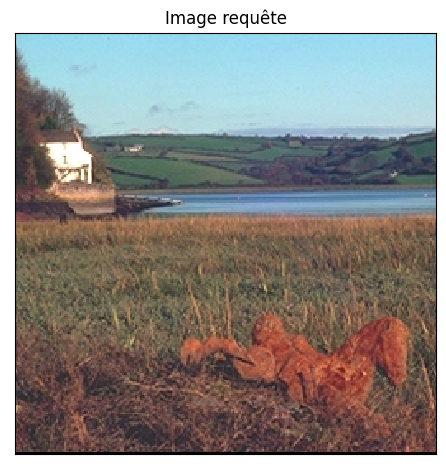

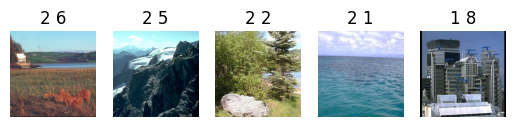

In [20]:
fig1 = plt.figure(1)
skio.imshow(img_requete)
plt.title("Image requête")
plt.xticks([])
plt.yticks([])
plt.figure(2)
for i in range(5):
    img = skio.imread("./input/" + str(ycbcr_sum_sorted[i][0]) + ".jpg")
    plt.subplot(1, 5, i+1), plt.title(str(ycbcr_sum_sorted[i][1])+' '+str(
        ycbcr_sum_sorted[i][2])), plt.axis('off')
    plt.imshow(img)
plt.show()

En somme, la **première méthode** donne de mauvais résultats puisqu'elle sélectionne **1** des 4 images avec une **même classe**. La **deuxième méthode** en sélectionne légèrement plus (**3**) mais cela reste tout de même insuffisant car les **sous-classes ne correspondent pas**.

### Tri par critère d'orientation
On réalise tout d'abord le tri en donnant la liste des critères (les gabor features) à la fonction *sort_values* avec les filtres dans l'ordre croissant. 

In [21]:
gabor_col = ['GaborFeature'+str(i) for i in range(24)]
gabor_sorted = df_distance[gabor_col]
gabor_sorted = gabor_sorted.sort_values(by=gabor_col).head().index
print(gabor_sorted)

MultiIndex([(1662, 2, 6),
            (1715, 2, 6),
            ( 418, 2, 2),
            (  65, 2, 1),
            ( 813, 1, 3)],
           )


On affiche notre image ainsi que les 4 images les plus proches d'après ce tri. On remarque que trois images possèdent des lignes avec une orientation horizontale comme l'image de référence. De plus, **3 images sur 4** ont la même classe et **1** possède aussi la même sous-classe.

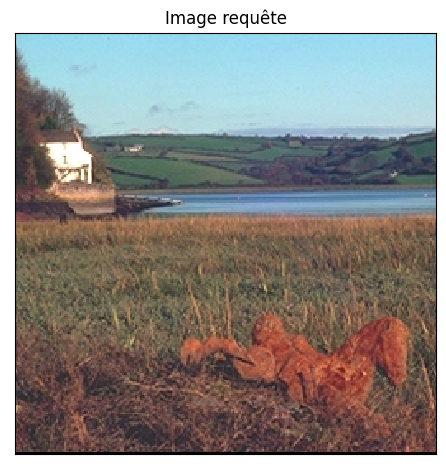

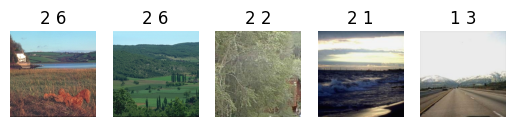

In [28]:
fig2 = plt.figure(2)

skio.imshow(img_requete)
plt.title("Image requête")
plt.xticks([])
plt.yticks([])
plt.figure(1)
for i in range(5):
    img = skio.imread("./input/" + str(gabor_sorted[i][0]) + ".jpg")
    plt.subplot(
        1, 5, i+1), plt.title(str(gabor_sorted[i][1])+' '+str(gabor_sorted[i][2])), plt.axis('off')
    plt.imshow(img)
plt.show()

On tri ensuite notre tableau par **somme de la distance entre les composantes de Gabor croissante**. 

In [24]:
gabor_sum = df_distance[gabor_col]
gabor_sum = gabor_sum.apply(np.sum, axis=1)
gabor_sum_sorted = gabor_sum.sort_values().head().index

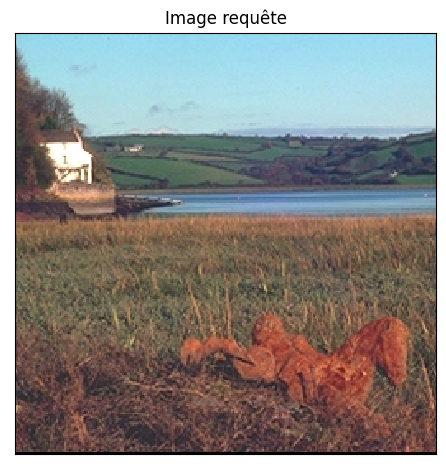

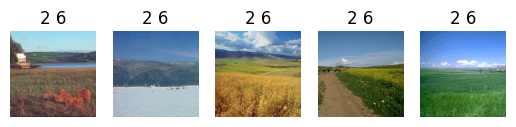

In [27]:
fig2 = plt.figure(2)

skio.imshow(img_requete)
plt.title("Image requête")
plt.xticks([])
plt.yticks([])
plt.figure(1)
for i in range(5):
    img = skio.imread("./input/" + str(gabor_sum_sorted[i][0]) + ".jpg")
    plt.subplot(1, 5, i+1), plt.title(str(gabor_sum_sorted[i][1])+' '+str(
        gabor_sum_sorted[i][2])), plt.axis('off')
    plt.imshow(img)
plt.show()

Avec cette technique de tri, toutes les images obtenues possèdent la **même classe** et la **même sous-classe** que l'image de base.

### Tri avec l'orientation, Y, Cb et Cr comme critère
Cette fois ci, nous utilisons **toutes les données du dataframe** pour faire notre algorithme de recherche. 

In [29]:
gabor_col.extend(ycbcr_col)
all_col = gabor_col
print(all_col)

['GaborFeature0', 'GaborFeature1', 'GaborFeature2', 'GaborFeature3', 'GaborFeature4', 'GaborFeature5', 'GaborFeature6', 'GaborFeature7', 'GaborFeature8', 'GaborFeature9', 'GaborFeature10', 'GaborFeature11', 'GaborFeature12', 'GaborFeature13', 'GaborFeature14', 'GaborFeature15', 'GaborFeature16', 'GaborFeature17', 'GaborFeature18', 'GaborFeature19', 'GaborFeature20', 'GaborFeature21', 'GaborFeature22', 'GaborFeature23', 'Y_Feature', 'Cb_Feature', 'Cr_Feature']


On ordonne tout d'abord notre dataframe avec comme critère de tri la liste precédemment créée. 

In [30]:
all_features_sorted = df_distance[all_col]
all_features_sorted = all_features_sorted.sort_values(by=all_col).head().index

Puis on affiche les 4 meilleurs résultats ainsi que l'image requête. 

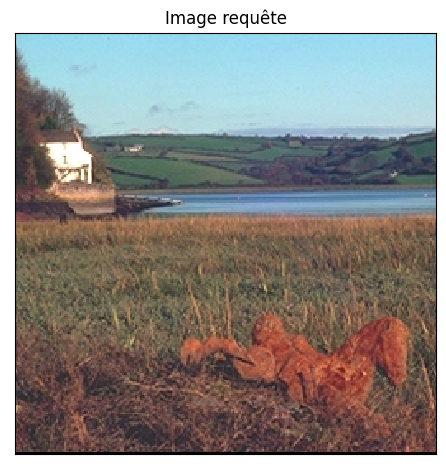

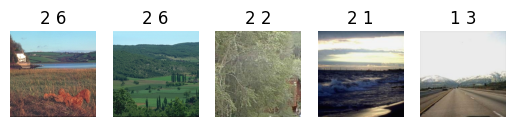

In [32]:
fig3 = plt.figure(3)
img_nbr = 1662
img = skio.imread("./input/" + str(img_nbr) + ".jpg")
img_requete = img
skio.imshow(img)
plt.title("Image requête")
plt.xticks([])
plt.yticks([])
plt.figure(1)
for i in range(5):
    img = skio.imread("./input/" + str(all_features_sorted[i][0]) + ".jpg")
    plt.subplot(1, 5, i+1), plt.title(str(all_features_sorted[i][1])+' '+str(
        all_features_sorted[i][2])), plt.axis('off')
    plt.imshow(img)
plt.show()

De la même manière que précedemmeent, on peut trier les images en fonction de la somme des distances euclidiennes de chaque composante de Gabor et de chaque composante Y, Cb et Cr.

In [33]:
all_features_sum = df_distance[all_col]
all_features_sum = all_features_sum.apply(np.sum, axis=1)
all_features_sum_sorted = all_features_sum.sort_values().head().index

On affiche l'image cible ainsi que les 4 images trouvées avec leur classe et sous-classe en titre. 

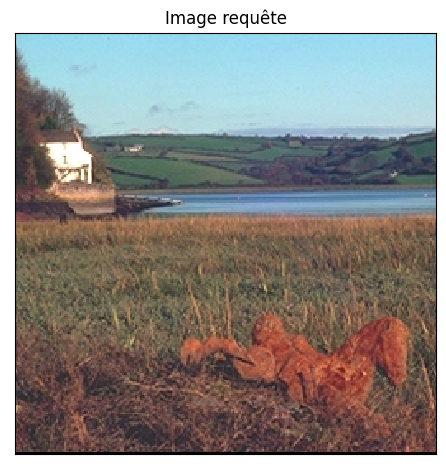

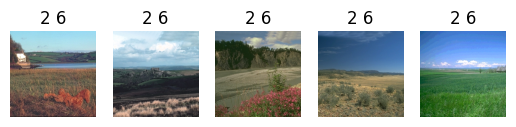

In [35]:
fig4 = plt.figure(4)
img_nbr = 1662
img = skio.imread("./input/" + str(img_nbr) + ".jpg")
img_requete = img
skio.imshow(img)
plt.title("Image requête")
plt.xticks([])
plt.yticks([])
plt.figure(1)
for i in range(5):
    img = skio.imread("./input/" + str(all_features_sum_sorted[i][0]) + ".jpg")
    plt.subplot(1, 5, i+1), plt.title(str(all_features_sum_sorted[i][1])+' '+str(
        all_features_sum_sorted[i][2])), plt.axis('off')
    plt.imshow(img)
plt.show()

Encore une fois, on remarque que la technique de tri par **somme des distances croissante** donne de bien **meilleurs résultats**. En effet, **toutes** les images trouvées possèdent la **même classe** et la **même sous-classe** que l'image cible de cette manière. La première technique ne trouve qu'**une** seule image possédant la **même classe** et la **même sous-classe** que l'image cible. 

### Conclusion
Cette partie du TP nous a permis de nous familiariser avec la librairie *pandas* qui permet de trier facilement une grande quantité de données. Nous avons pu remarquer que dans une situation où nous ne savons pas sur quel critère donner le plus de poids parmis ceux dont l'on dispose, il est préférable de classer notre dataframe de manière **croissante** en fonction de la **somme de tous les critères**. Enfin, il est regrettable de ne pas avoir accès à la manière dont les données ont été **normalisées**. Nous avons essayé de **centrer** et **réduire** nos données (à la manière d'une loi de Gauss) mais cela nous a donné des **résultats différents** par rapport au dataframe. Cela aurait permis d'utiliser une image **extérieure à la base de données** comme image requête. 